In [1]:
from collections import Sequence
from scipy import constants

from scipy.optimize import approx_fprime

import numpy as np
import matplotlib.pyplot as plt

from pescado.mesher import patterns
from pescado.mesher import shapes
from pescado.poisson import Problem, ProblemBuilder
from pescado.tools import SparseVector

import ildos
import solver
import problem

/tmp/ipykernel_366690/862455406.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Sequence


In [2]:
import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif', size=30)

In [3]:
def disc_ildos(surf):

    dos = 1 * (0.067 * constants.m_e) / (np.pi * constants.hbar ** 2)
    dens_helm = dos * 1e-18 * constants.elementary_charge * surf
    # The value of A corresponds to a one-dimension unit cell

    coord = np.empty((3, 2), dtype=float)
    coord[:, 0] = np.array([-1, 0, 1])
    coord[:, 1] = np.array([0, 0, dens_helm])

    return coord


In [4]:
def ildos_pesca(mu):

#    const = (10
#             * ((2 * 0.067 * constants.m_e * 1e-18) / constants.hbar ** 2) ** (3/2)
#             * (2 / 3)
#             * (1 / (2 * np.pi ** 2)))
    aq = 1e-9
    t = constants.hbar**2 / (2. * constants.m_e * 0.067 * aq**2)
    dens = (1 / t ** 2) * (1 / (2 * np.pi)) * 2 * (constants.elementary_charge ** 2)
   
    if not isinstance(mu, (np.ndarray, Sequence)):
        if mu <= 0:
            dens_ =  0
            ildos_ =  0
        else:
            dens_ = 2 * dens * mu
            ildos_ = dens * (mu ** 2)
    else:
        mu_zero = mu <= 0
        ildos_ = dens * (mu ** 2)
        ildos_[mu_zero] = 0
        dens_ = 2 * np.ones(len(mu)) * dens * mu
        
    return dens_, ildos_

def ildos_zero(mu):
    if not isinstance(mu, (np.ndarray, Sequence)):
        return 0, 0
    else:
        return np.zeros(len(mu)), np.zeros(len(mu))

coord = np.empty((3, 2), dtype=float)
coord[:, 0] = np.array([-1, 0, 1])
coord[:, 1] = np.array([0, 0, ildos_pesca(1)[1]])

ildos_cont = ildos.PContinuousIldos(coordinates=coord, functions=[ildos_zero, ildos_pesca])

In [5]:
dos = 1 * (0.067 * constants.m_e) / (np.pi * constants.hbar ** 2)
dens_helm = dos * 1e-18 * constants.elementary_charge * 2 * 2
print(dens_helm)

1.1195203402076617


In [6]:
print(ildos_pesca(0.01))
print(ildos_pesca(0.01))

(0.019687195505687396, 9.843597752843698e-05)
(0.019687195505687396, 9.843597752843698e-05)


In [7]:
ildos_c = ildos.PLinearIldos.from_array(coordinates=disc_ildos(surf=10))

In [8]:
ildos_c.add_interval(
    u=0.3, dos=dens_helm / 1.25, origin=0)

print(len(ildos_c.fpoints))
print(len(ildos_c.dos))

4
4


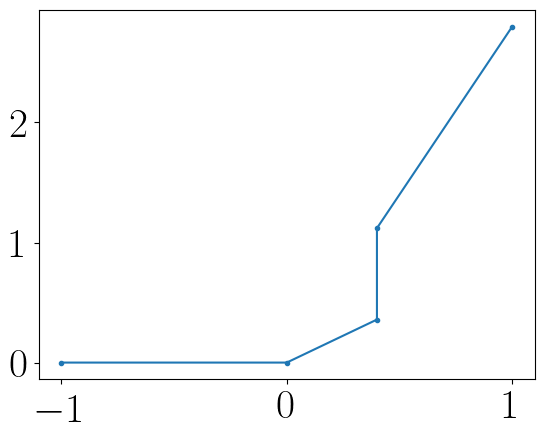

In [9]:
plt.plot(ildos_c.coordinates[:, 0], ildos_c.coordinates[:, 1], '.-')

In [10]:
ildos_c.add_interval(
    u=0.36, dos=0, origin=1)

print(len(ildos_c.fpoints))
print(len(ildos_c.dos))

6
6


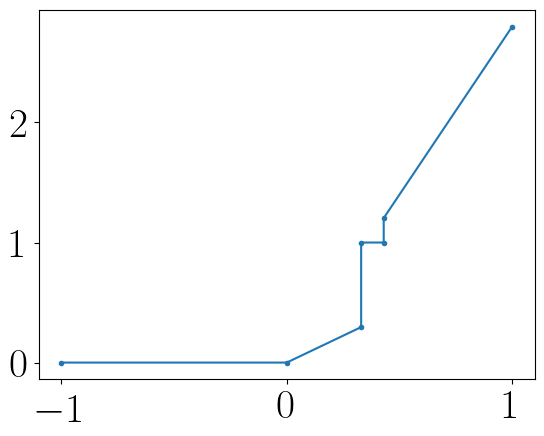

In [11]:
plt.plot(ildos_c.coordinates[:, 0], ildos_c.coordinates[:, 1], '.-')


In [12]:
ildos_c.add_interval(
    u=0.9, dos= 3 * dens_helm, origin=0)

print(len(ildos_c.fpoints))
print(len(ildos_c.dos))

8
8


In [13]:
np.insert(np.array([0, 1, 2]), [1, 2], [10, 10])


array([ 0, 10,  1, 10,  2])

In [14]:
ildos_c.coordinates

array([[-1.        ,  0.        ],
       [-0.        ,  0.        ],
       [ 0.33      ,  0.29555337],
       [ 0.33      ,  1.        ],
       [ 0.43      ,  1.        ],
       [ 0.43      ,  1.20348437],
       [ 0.7       ,  1.9591606 ],
       [ 0.7       ,  2.35099271],
       [ 1.        ,  3.35856102]])

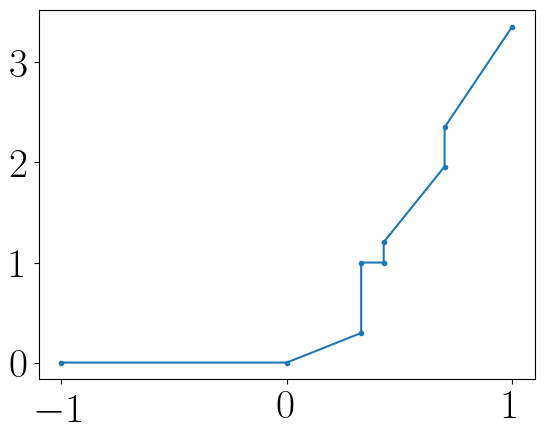

In [15]:
plt.plot(ildos_c.coordinates[:, 0], ildos_c.coordinates[:, 1], '.-')
#plt.xlim(-1, -.5)
#plt.ylim(1, 5)

In [16]:
ildos_c.add_interval(
    u=-.7, dos=dens_helm, origin=0)

In [17]:
ildos_c.coordinates

array([[-1.        , -1.11952034],
       [-0.6       , -0.6717122 ],
       [-0.6       ,  0.        ],
       [-0.        ,  0.        ],
       [ 0.33      ,  0.29555337],
       [ 0.33      ,  1.        ],
       [ 0.43      ,  1.        ],
       [ 0.43      ,  1.20348437],
       [ 0.7       ,  1.9591606 ],
       [ 0.7       ,  2.35099271],
       [ 1.        ,  3.35856102]])

In [18]:
np.sort(ildos_c.coordinates, axis=0)

array([[-1.        , -1.11952034],
       [-0.6       , -0.6717122 ],
       [-0.6       ,  0.        ],
       [-0.        ,  0.        ],
       [ 0.33      ,  0.29555337],
       [ 0.33      ,  1.        ],
       [ 0.43      ,  1.        ],
       [ 0.43      ,  1.20348437],
       [ 0.7       ,  1.9591606 ],
       [ 0.7       ,  2.35099271],
       [ 1.        ,  3.35856102]])

In [19]:
ildos_c.fpoints

array([[-0.7       , -0.78366424],
       [        nan,         nan],
       [-0.5       ,  0.        ],
       [ 0.3       ,  0.26868488],
       [        nan,         nan],
       [ 0.36      ,  1.        ],
       [        nan,         nan],
       [ 0.5       ,  1.39940043],
       [        nan,         nan],
       [ 0.9       ,  3.02270492]])

In [20]:
len(ildos_c.origin)

10

In [21]:
len(ildos_c.dos)

10

(-0.5, 0)

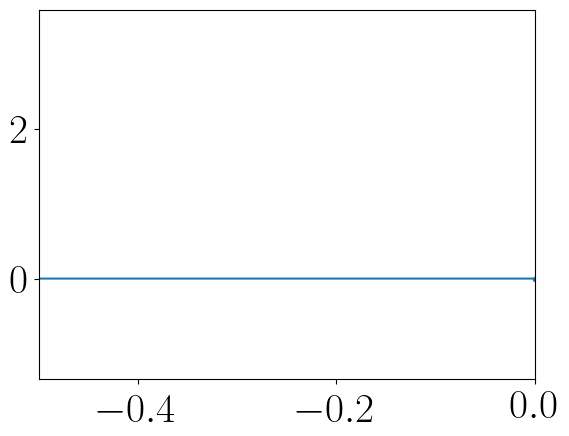

In [22]:
plt.plot(ildos_c.coordinates[:, 0], ildos_c.coordinates[:, 1], '.-')
plt.xlim([-.5, 0])

In [23]:
ildos_c.add_interval(
    u=-0.33, dos=0, origin=0)

print(len(ildos_c.fpoints))
print(len(ildos_c.dos))

10
10


In [24]:
len(ildos_c.coordinates)

11

In [25]:
len(ildos_c.fpoints)

10

In [26]:
# Define the ProblemBuilder
pb = ProblemBuilder()

### Define the Finite volume mesh
# Begin defining the mesh spacing
rect_pattern = patterns.Rectangular.constant(element_size=(4, 10))
# Define the space occupied by the system
system = shapes.Box(lower_left=[-1000, -55], size=[2000, 600])

# Make the mesh
pb.initialize_mesh(
  simulation_region=system, pattern=rect_pattern)

### Set relative dielectric permittivity
dielectric = shapes.Box(lower_left=[-1000, -55], size=[2e3, 160])
pb.set_relative_permittivity(val=12, region=dielectric)

gate = (shapes.Box(lower_left=[-1000, 105], size=[650, 10])
        | shapes.Box(lower_left=[-100, 105], size=[200, 10])
        | shapes.Box(lower_left=[350, 105], size=[650, 10]))
pb.set_relative_permittivity(val=1e4, region=gate)
                             
### Split sites into N, D, H and F.
# Define the remaining regions
dopants = shapes.Box(lower_left=[-1000, 35], size=[2000, 20])
twodeg = shapes.Box(lower_left=[-1000, -4.9], size=[2000, 9.8])

# Define local boundary conditions
pb.set_dirichlet(region=gate, setup_tag='gate')
pb.set_flexible(region=twodeg, setup_tag='2deg')
#pb.set_helmholtz(region=twodeg, setup_tag='2deg')
pb.set_neumann(region=dopants, setup_tag='dopants')

pd = pb.finalized()

In [27]:
fpoints = np.array([-0.8,-0.2, 0.1, .2, .3, .45, .6, .8, .9])
u = np.linspace(-1, 1, 100)
dos, ildos = ildos_cont(u)

ildos_disc = ildos_cont.linearize(fpoints=fpoints)

#plt.plot(u, ildos, 'k.-')

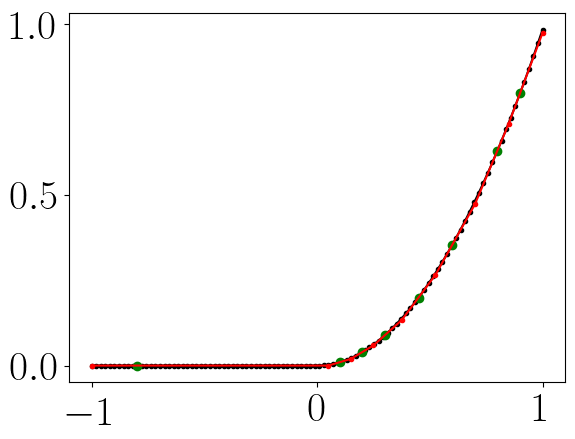

In [28]:
plt.plot(u, ildos, 'k.-')
plt.plot(ildos_disc.fpoints[:, 0], ildos_disc.fpoints[:, 1], 'go')
plt.plot(ildos_disc.coordinates[:, 0], ildos_disc.coordinates[:, 1], 'r.-')

In [29]:
#sc_solver = solver.SelfConsistent(ildos=disc_ildos(surf=10), poisson_problem=pd)

sc_solver = solver.SchrodingerPoisson(ildos=ildos_cont, poisson_problem=pd)


In [30]:
tol = 0.1

t = np.array([0, 1, np.nan, 2])

intervals_ = np.arange(len(t), dtype=int)[~np.isnan(t)]
v=2
print(t - v)
print(tol)

i = np.searchsorted((t[intervals_] - v), tol, side='left')
print(i)

[-2. -1. nan  0.]
0.1
3


In [31]:
np.nan != np.nan

True

In [32]:
poisson_input = {
    'voltage':pd.sparse_vector(val=-0.2, name='gate'), 
    'charge_density':pd.sparse_vector(val=1e23 * 1e-27, name='dopants')}

res = sc_solver.solve_discretized(
    poisson_input=poisson_input, 
    initial_guess=SparseVector(indices=pd.points(name='2deg'), 
                               values=np.zeros(len(pd.points(name='2deg')))))

Total time in solve 0.49828052520751953
Time spent solving the linear problem 0.3882627487182617
Total time in solve 0.5140495300292969
Time spent solving the linear problem 0.3778421878814697
Total time in solve 0.48282861709594727
Time spent solving the linear problem 0.37247586250305176
Total time in solve 0.43322253227233887
Time spent solving the linear problem 0.29927802085876465
Total time in solve 0.42268848419189453
Time spent solving the linear problem 0.30596351623535156
Total time in solve 0.47480297088623047
Time spent solving the linear problem 0.3499610424041748
Total time in solve 0.43314242362976074
Time spent solving the linear problem 0.2984933853149414
Total time in solve 0.41037487983703613
Time spent solving the linear problem 0.29714155197143555


In [33]:
res_pi = sc_solver.solve_plinear(
    poisson_input=poisson_input, 
    initial_fpoints=np.array([-.5, .0, .5, .9]), 
    initial_guess=SparseVector(indices=pd.points(name='2deg'), 
                               values=np.zeros(len(pd.points(name='2deg')))),
    max_ite=5)

At solve discretized
Total time in solve 0.5478646755218506
Time spent solving the linear problem 0.44168996810913086
Total time in solve 0.42421865463256836
Time spent solving the linear problem 0.3163154125213623
0
Total time in solve 0.46114635467529297
Time spent solving the linear problem 0.3488154411315918
Total time in solve 0.60671067237854
Time spent solving the linear problem 0.48485636711120605


In [34]:
print(ildos_pesca(0.5))
print(ildos_pesca(0.5))


(0.9843597752843698, 0.24608994382109245)
(0.9843597752843698, 0.24608994382109245)


In [35]:

isinstance(list(), Sequence)

True

In [36]:
ildos_pesca(0.01)

(0.019687195505687396, 9.843597752843698e-05)

In [37]:
plt.plot(
    res['iteration_data'][-1]['quantum_potential'].values, 'g.')

plt.plot(
    res['iteration_data'][-5]['quantum_potential'].values, 'r.')


In [38]:
plt.plot(
    res['iteration_data'][-1]['quantum_total_charge'].values, 'g.')

plt.plot(
    ildos_pesca(
        res['iteration_data'][-1]['quantum_potential'].values)[1], 'r.')

#plt.plot(
#    res_pi['iteration_data'][-1]['iteration_data'][-1]['quantum_total_charge'].values, 'r.')
plt.show()
plt.plot(
    res['iteration_data'][-1]['quantum_potential'].values, 'r.')

plt.plot(
    res['iteration_data'][-5]['quantum_potential'].values, 'r.')

plt.plot(
    res['iteration_data'][-1]['chem'].values, 'g.')

#plt.plot(
#    res['iteration_data'][-1]['quantum_potential'].values, 'r.')

#plt.ylim([-.002, 0])
#plt.plot(
#    res['iteration_data'][-2]['quantum_potential'].values, 'g.')


#plt.plot(
#    res_pi['iteration_data'][-1]['iteration_data'][-1]['quantum_potential'].values, 'r.')

In [39]:
old_sc_solver = problem.SchrodingerPoisson(
    ildos=disc_ildos(surf=2), poisson_problem_inst=pd)

In [40]:
initial_config = pd.sparse_vector(
    val=1, indices=pd.points(name='2deg'), dtype=int)

old_sc_solver.initialize(
    initial_guess=initial_config,
    poisson_problem_input=poisson_input,
    return_poisson_output=False)

old_sc_solver.iterate()

while np.any(
        np.abs(old_sc_solver.iteration_data[-1]['interval']
                - old_sc_solver.iteration_data[-2]['interval']) != 0):

    old_sc_solver.iterate()

gas_charge = old_sc_solver.charge(iteration=-1)
gas_voltage = old_sc_solver.potential(iteration=-1)

Total time in solve 0.3712127208709717
Time spent solving the linear problem 0.25851941108703613
Total time in solve 0.4734327793121338
Time spent solving the linear problem 0.3616030216217041
Total time in solve 0.5072941780090332
Time spent solving the linear problem 0.3912832736968994
Total time in solve 0.6087455749511719
Time spent solving the linear problem 0.48230504989624023
Total time in solve 0.4723048210144043
Time spent solving the linear problem 0.3291919231414795


In [41]:
cov_pot = res['iteration_data'][-1]['quantum_potential'].values

#plt.plot(gas_charge.values, 'r.')

#plt.plot(
#    res['iteration_data'][-1]['quantum_total_charge'].values, 'k.')

plt.plot(
    res_pi['iteration_data'][-1]['iteration_data'][-3]['quantum_total_charge'].values, 'g.')

#plt.plot(ildos_cont(cov_pot)[1] * 2, 'm.')

#plt.plot(
#    ildos_cont(res_pi['iteration_data'][-1]['iteration_data'][-1]['quantum_potential'].values)[1], 
#    'm')

plt.show()

#plt.plot(gas_voltage.values, 'r.')

plt.plot(res['iteration_data'][-1]['quantum_potential'].values, 'k.')
#plt.plot(res['iteration_data'][-2]['quantum_potential'].values, 'r.')

#plt.plot(res_pi['iteration_data'][-1]['iteration_data'][-1]['quantum_potential'].values, 'm.')

#plt.plot(cov_pot, 'g.')



IndexError: list index out of range

In [ ]:
res_pi['iteration_fpoints'][-1]

In [ ]:
ildos_cont(u=cov_pot)

In [ ]:
res['iteration_data'][-2]['quantum_potential'].values[
    res['iteration_data'][-2]['quantum_potential'].values > 0]